# Credit Card Fraud detection project


### 1. Problem
To recognize Fraud Transactions.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### 2.Data
Download dataset from:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### 3. Evaluation
The trained model will be evaluated using confusion matrix and roc_curve.

### 4. Features
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.




## Importing libraries

In [278]:
import numpy as np
import pandas as pd
import sklearn
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
LABELS = ["Normal", "Fraud"]

In [280]:
#Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

#To import warnings
import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [281]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [282]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [284]:
data.shape

(284807, 31)

Plotting the distribution of a variable

In [285]:
x = data.drop(['Class'],axis = 1)

In [286]:
#Accumulating all the column names uner one variable
cols = list(x.columns.values)

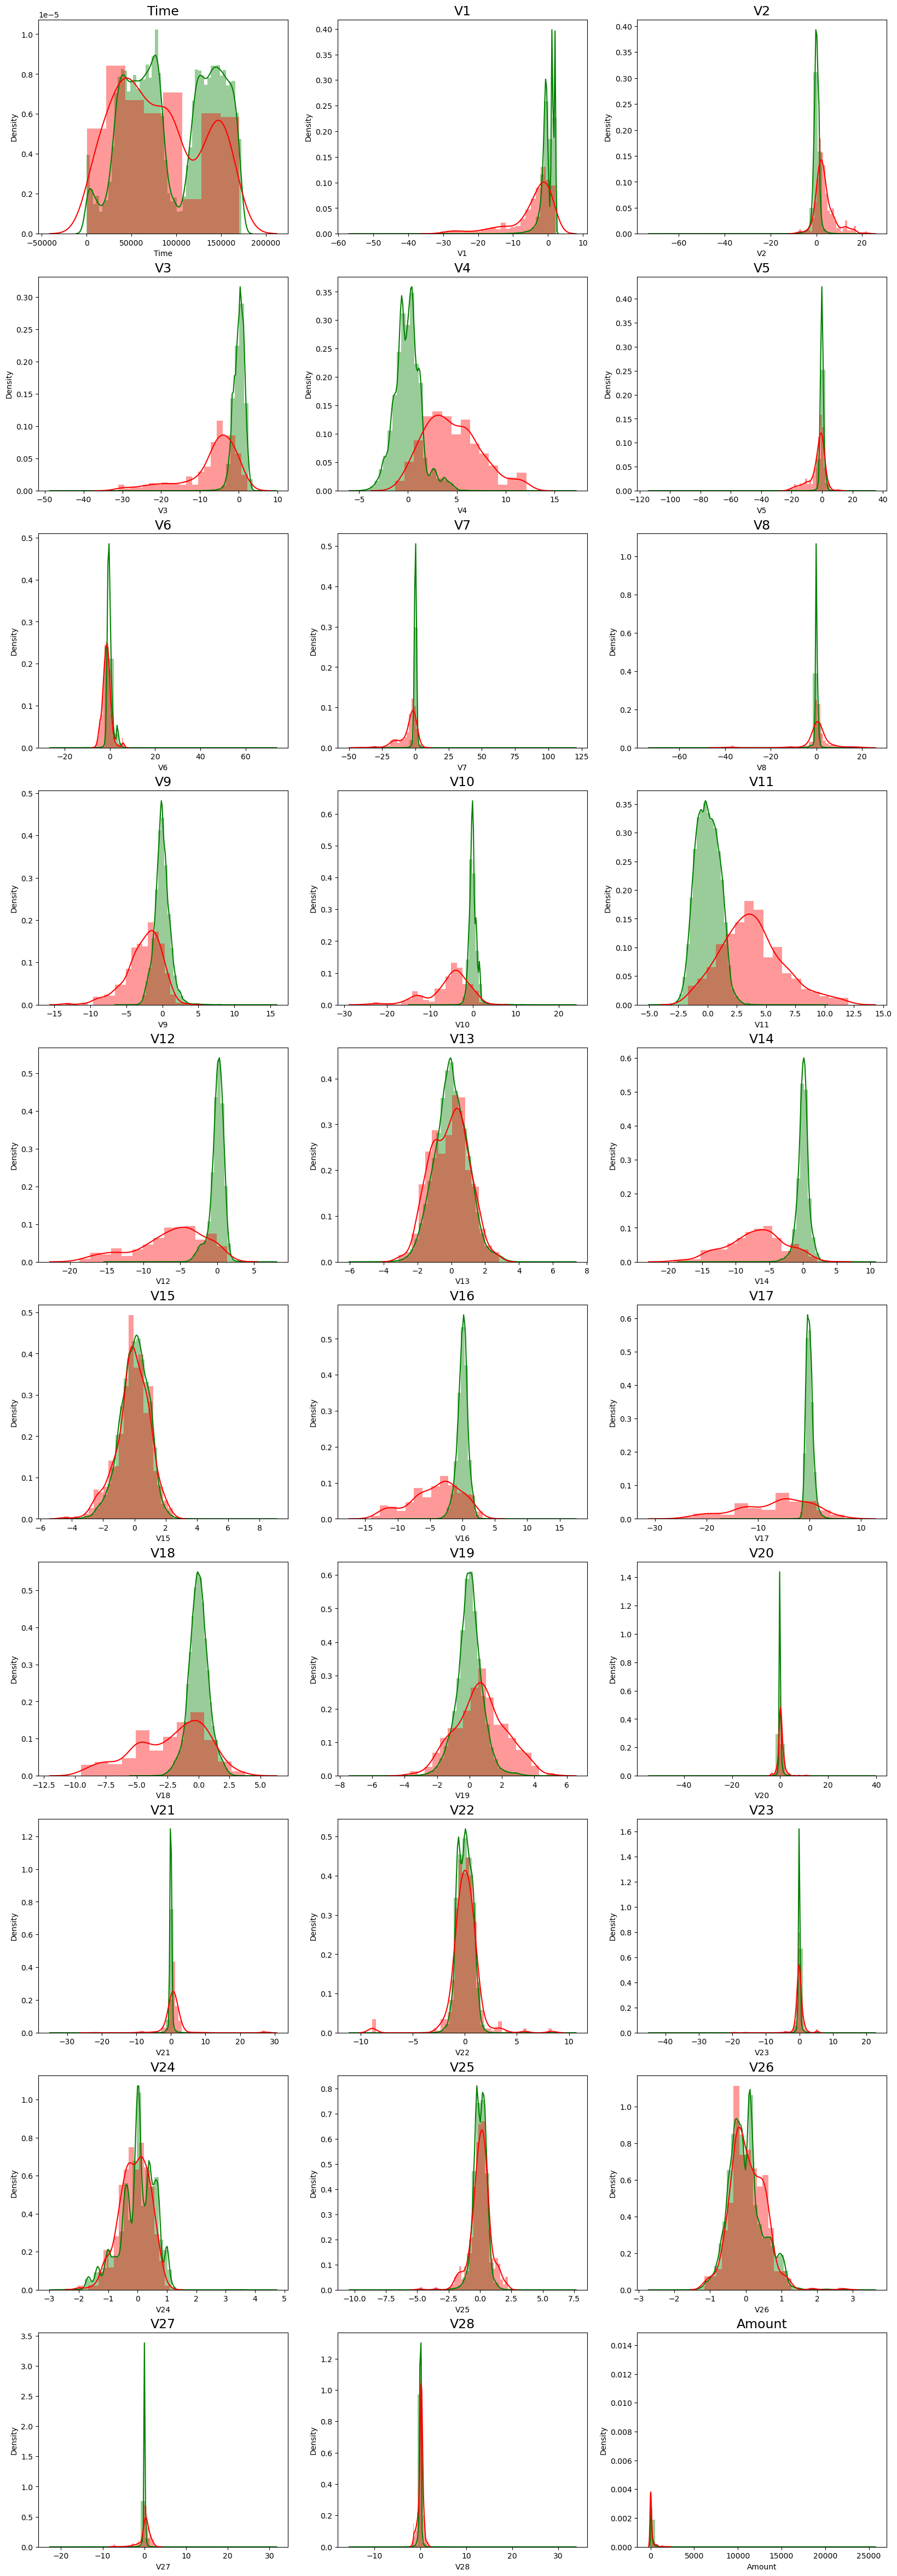

In [287]:
#Plot the histogram of a variable from the dataset to see the skewness
normal_records = data.Class == 0
fraud_records = data.Class == 1

plt.figure(figsize=(20,60))
for n , col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(x[col][normal_records], color = 'green')
    sns.distplot(x[col][fraud_records] , color = 'red')
    plt.title(col,fontsize = 17)
plt.show();

## Exploratory Data Analysis

In [288]:
#checking missing values
data.isnull().values.any()

False

In [289]:
#distribution of legit transaction and fraudulent transaction
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

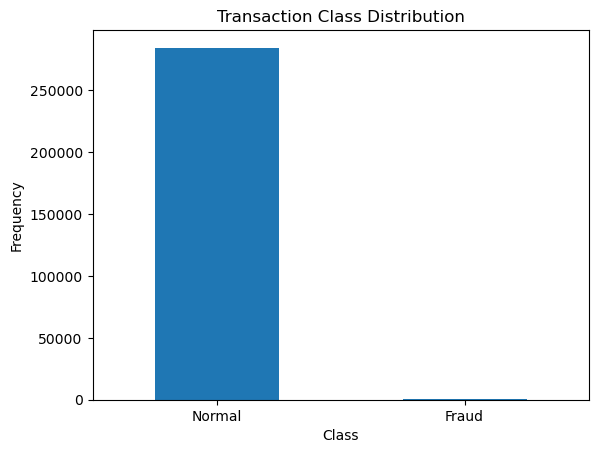

In [290]:
count_classes = pd.value_counts(data['Class'])
count_classes.plot(kind = 'bar')
plt.title("Transaction Class Distribution")
plt.xticks(range(0,2), ['Normal','Fraud'],rotation = 0)
#plt.xticks([0,1], ['Normal','Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency");

In [291]:
#Get the Fraud and the normal dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [292]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [293]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [245]:
## Analysing data in different classes

In [294]:
#fraud class
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [295]:
#normal class
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [296]:
#compare the values for both transactions

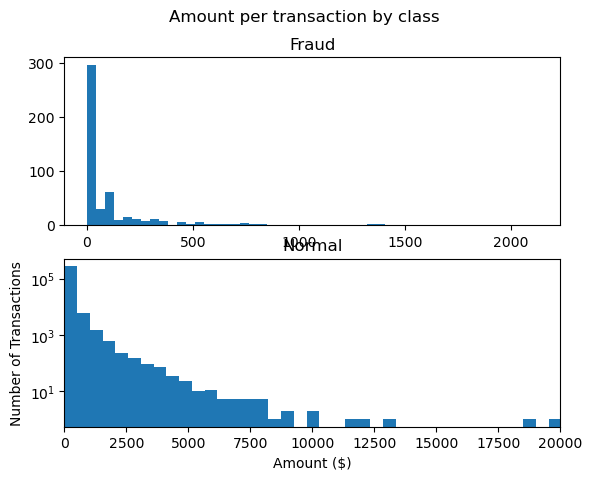

In [297]:
#exploring data transaction of different classes w.r.t amount
f,(ax1,ax2) = plt.subplots(2,1)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

Fraud transaction are done on less Amount($)

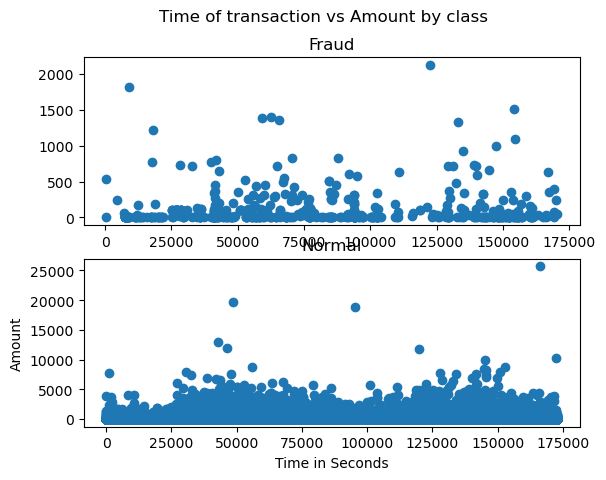

In [300]:
#exploring data transaction of different class w.r.t time
f,(ax1,ax2) = plt.subplots(2,1)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time in Seconds')
plt.ylabel('Amount')
plt.show()

Fraud transaction are done in close time intervals

In [301]:
#Take some sample of data 
# data1 = data.sample(frac = 0.1 , random_state = 1)
data1 = data.sample(frac = 0.1)
data1.shape 

(28481, 31)

In [302]:
data.shape

(284807, 31)

In [303]:
#Determine the number of fraud and valid transactions in the dataset
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [304]:
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))
print("outlier_fraction : {}".format(outlier_fraction) )

Fraud Cases : 53
Valid Cases : 28428
outlier_fraction : 0.001864359082594625


In [255]:
#Anothe code using 
#legit and fraud_data

## Under-Sampling

Build a sample dataset containing similar distribution of normal transaction and Fraudulent Transactions

No. of fraudulent transaction --> 492

Merge 492 fraud tansaction with 492 legit transaction

In [305]:
legit = data[data["Class"]==0]
fraud_data = data[data["Class"]==1]

In [306]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [307]:
legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [308]:
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [309]:
legit_sample = legit.sample(n=min(fraud_data.Amount.size,legit.Amount.size))
fraud_sample = fraud_data.sample(n=min(fraud_data.Amount.size,legit.Amount.size))

In [310]:
print(legit_sample.shape)
print(fraud_sample.shape)

(492, 31)
(492, 31)


## Concatinating two DataFrames

In [311]:
new_dataset = pd.concat([legit_sample,fraud_sample],axis=0)

In [312]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
166291,117979.0,2.050541,-0.364329,-2.542955,-0.729276,2.388357,3.318051,-0.479005,0.791533,0.403362,...,-0.293302,-0.834855,0.381652,0.698185,-0.264835,0.219264,-0.052150,-0.066923,0.99,0
191742,129396.0,-1.725131,0.164719,1.335603,-0.603187,0.464777,1.435281,-0.284479,1.075486,-0.163830,...,0.043421,-0.058591,0.011455,-1.477278,0.093219,-0.303840,-0.112637,-0.044916,58.95,0
200321,133387.0,1.937749,-1.313936,-0.560307,-0.890311,-1.155088,-0.349950,-0.937994,0.014332,-0.123619,...,0.046135,-0.130153,0.247753,-0.365584,-0.533413,-0.494819,-0.012782,-0.036000,114.00,0
15163,26521.0,1.170009,-0.136050,0.756707,0.858434,-0.992131,-0.895462,-0.206650,-0.031471,0.776021,...,-0.290271,-0.791151,0.127062,0.689094,0.207231,0.270181,-0.037063,0.018103,23.74,0
280259,169414.0,1.943020,-0.015672,-1.699566,1.425564,0.295053,-1.124751,0.613379,-0.350964,0.404390,...,0.057991,0.226906,-0.035315,-0.112600,0.405017,-0.485553,-0.032288,-0.057541,54.99,0


In [313]:
new_dataset.shape

(984, 31)

In [314]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192584,129764.0,-2.434004,3.225947,-6.596282,3.593161,-1.079452,-1.739741,-0.047420,0.301424,-1.779434,...,-0.035491,-0.419178,0.157436,-0.714849,0.468859,-0.348522,0.420036,-0.327643,362.55,1
27362,34521.0,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52,1
106998,70229.0,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,-1.657635,...,0.345921,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064,3.79,1
123301,76876.0,-1.298359,1.079671,-0.180678,1.287839,1.858273,-2.223695,0.525167,-0.096874,-0.168893,...,-0.332983,-0.851270,-0.370800,0.298242,0.442930,-0.522832,0.000105,0.135698,1.00,1
141259,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1


In [315]:
from sklearn.utils import shuffle

new_dataset = shuffle(new_dataset)

In [316]:
new_dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [317]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95112.315041,0.114752,-0.004998,0.034334,-0.003668,-0.033659,0.089538,0.028991,-0.002715,0.051160,...,-0.005670,-0.021142,0.050730,-0.002746,-0.041364,0.000105,-0.007811,0.005329,-0.015378,90.750732
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [318]:
X = new_dataset.drop(columns = 'Class',axis = 1)
Y = new_dataset['Class']

In [319]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6717,8408.0,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,...,0.576656,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,1.00
77348,57007.0,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,...,0.560478,0.652941,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.632800,0.250187,0.01
102443,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00
84543,60353.0,-3.975216,0.581573,-1.880372,4.319241,-3.024330,1.240793,-1.909559,0.660718,-2.752611,...,-0.656511,0.578984,1.397311,1.045322,-0.304000,0.005295,0.235435,0.962015,-0.673557,454.82
54011,46251.0,1.255352,0.263414,0.280021,0.705744,-0.484026,-1.103277,0.001519,-0.132462,0.222764,...,-0.161271,-0.302040,-0.932809,0.144456,0.310963,0.173549,0.098614,-0.031289,0.028126,1.79


In [320]:
Y.head()

6717      1
77348     1
102443    1
84543     1
54011     0
Name: Class, dtype: int64

## Split the data into training data and testing data

In [321]:
X_train , X_test, Y_train, Y_test = train_test_split(X , Y , test_size=0.2 , stratify = Y, random_state = 2)
#stratify ensures evenly distribution of 0 and 1 in test and training dataset

In [322]:
print(X.shape , X_train.shape , X_test.shape)

(984, 30) (787, 30) (197, 30)


## Model Training

Logistic Regression

In [323]:
def evaluation_result(clf,X_test,Y_test):
    predictions_dt = clf.predict(X_test)
    print('Precision Score : ', precision_score(predictions_dt,Y_test))

    print('Recall Score : ', recall_score(predictions_dt,Y_test))

    print('Accuracy Score : ', accuracy_score(predictions_dt,Y_test))

    print('F1 Score : ', f1_score(predictions_dt,Y_test))
    
    Plot_confusion_matrix(  predictions_dt , Y_test )
    
    eval_dict = {'precission': precision_score(predictions_dt,Y_test),
                 'Recall Score' : recall_score(predictions_dt,Y_test),
                 'Accuracy Score': accuracy_score(predictions_dt,Y_test),
                 'F1 Score': f1_score(predictions_dt,Y_test)}
    return eval_dict

In [324]:
lr = LogisticRegression(random_state=2)

In [325]:
#training the Logistic Regression Model with Training Data
lr.fit(X_train, Y_train)

LogisticRegression(random_state=2)

Precision Score :  0.9489795918367347
Recall Score :  0.9587628865979382
Accuracy Score :  0.9543147208121827
F1 Score :  0.9538461538461539


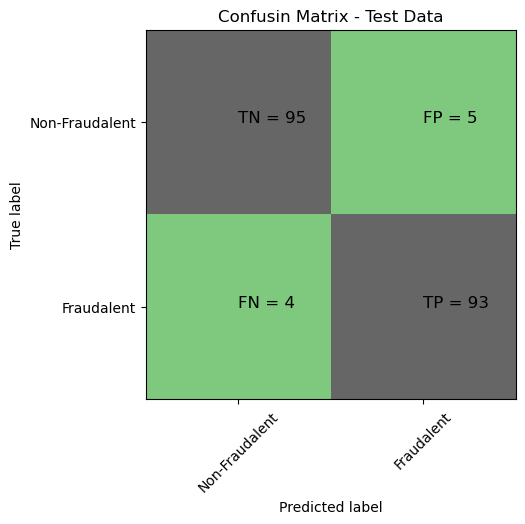

In [326]:
lr_result = evaluation_result(model,X_test,Y_test)
lr_probs = lr.predict_proba(X_test)

Random Forest and Decision Tree Classifiers

In [327]:
#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100,random_state = 2)
random_forest.fit(X_train,Y_train)

RandomForestClassifier(random_state=2)

Precision Score :  0.9387755102040817
Recall Score :  0.9787234042553191
Accuracy Score :  0.9593908629441624
F1 Score :  0.9583333333333333


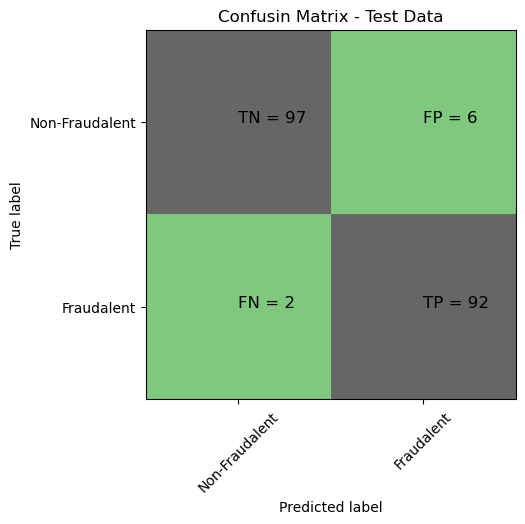

In [328]:
rf_result = evaluation_result(random_forest,X_test,Y_test)
rf_probs = random_forest.predict_proba(X_test)

In [329]:
xg = xgb.XGBClassifier()

In [330]:
xg.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Precision Score :  0.9489795918367347
Recall Score :  0.96875
Accuracy Score :  0.9593908629441624
F1 Score :  0.9587628865979382


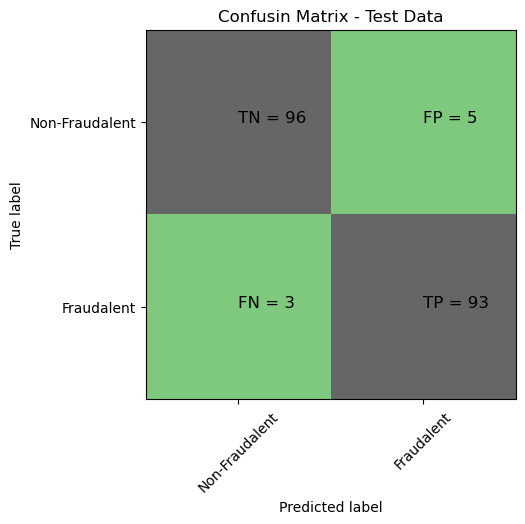

In [331]:
xg_result = evaluation_result(xg,X_test,Y_test)
xg_probs = xg.predict_proba(X_test)

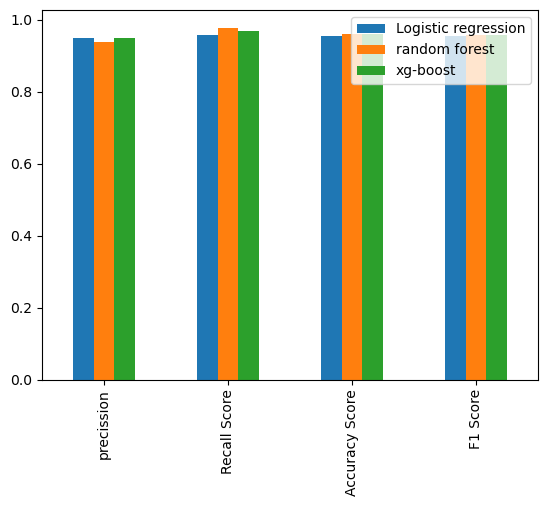

In [332]:
p = pd.DataFrame({'Logistic regression': lr_result,
                  'random forest' : rf_result,
                  'xg-boost' : xg_result})
p.plot.bar();

In [333]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
    plt.plot([0,1],[0,1], color = 'green', linestyle = '--', label = 'Guessing')
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('true positive rate(tpr)')
    plt.title('Receiver Operating Characteristics(ROC) Curve')
    plt.legend()
    plt.show()


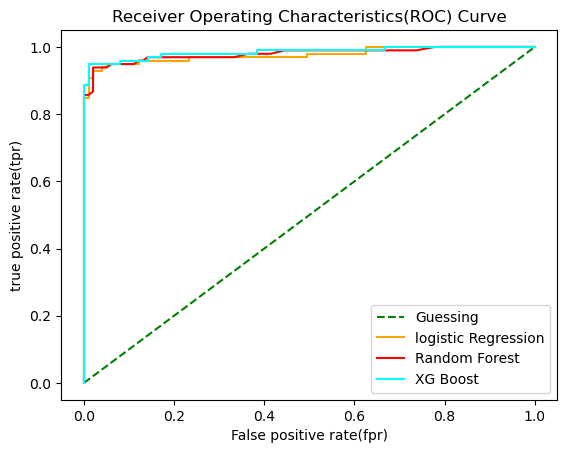

In [334]:

plt.plot([0,1],[0,1], color = 'green', linestyle = '--', label = 'Guessing')
plt.xlabel('False positive rate(fpr)')
plt.ylabel('true positive rate(tpr)')
plt.title('Receiver Operating Characteristics(ROC) Curve')

# logistic regression
fpr, tpr, threshold = roc_curve(Y_test,lr_probs[:,1])
plt.plot(fpr,tpr, color = 'orange', label = 'logistic Regression')

# random forest
fpr, tpr, threshold = roc_curve(Y_test,rf_probs[:,1])
plt.plot(fpr,tpr, color = 'red', label = 'Random Forest')

# xg boost
fpr, tpr, threshold = roc_curve(Y_test,xg_probs[:,1])
plt.plot(fpr,tpr, color = 'cyan', label = 'XG Boost')

plt.legend()
plt.show()


In [335]:
from sklearn.ensemble import VotingClassifier
# Combine the models using majority voting

ensemble = VotingClassifier(estimators=[('logistic regression', lr), ('random forest', random_forest), ('xg-boost', xg)])

# Fit the ensemble on the training data
ensemble.fit(X_train, Y_train)

# Evaluate the performance of the ensemble on the testing data
print(f"Accuracy of the ensemble: {ensemble.score(X_test, Y_test)*100} %")

Accuracy of the ensemble: 95.93908629441624 %


Precision Score :  0.9387755102040817
Recall Score :  0.9787234042553191
Accuracy Score :  0.9593908629441624
F1 Score :  0.9583333333333333


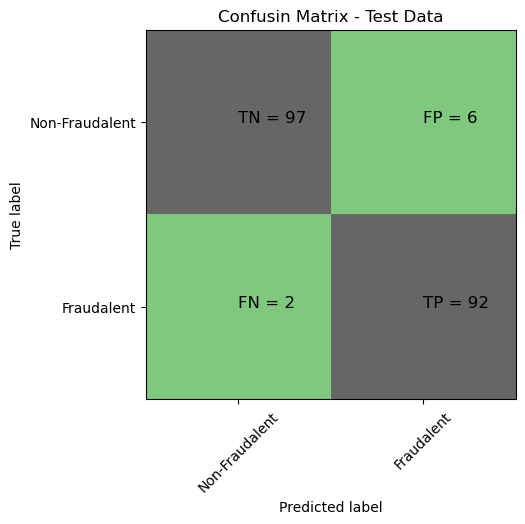

In [336]:
ensemble_result = evaluation_result(ensemble,X_test,Y_test)
